# Datasets

`torchvision` is the development of a more basic `torch`. So it's datasets have some features that will be described here.

In [107]:
from IPython.display import HTML

import torch
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10

import torchvision.transforms as T

def vis_dataset(dataset):
    '''
    Fucntion that visualises classified 
    picture dataset. For each class there is
    a line that contains all pictures of that class.

    Agruments
    ------------
    dataset (torchvision.datasets.vivion.VisisonDataset) :
            dataset that needed to be visualised;
    '''
    separated = {}
    for v in dataset:
        if not(v[1] in separated):
            separated[v[1]] = []
        separated[v[1]].append(v[0])
    
    classes_count = len(separated)
    plt.figure(figsize = (15, 5))
    
    for i, (class_name, class_picks) in enumerate(separated.items()):
        plt.subplot(classes_count, 1, i + 1)
    
        plt.title(f"class : {class_name}")
        plt.imshow(T.ToPILImage()(
            make_grid(
                [T.ToTensor()(pic) for pic in class_picks], 
                nrow=len(class_picks)
            )
        ))
        plt.xticks([]);plt.yticks([])

## Image folder

It's really common to work with data structured like this: there's `folder_1`, `folder_2`, ..., `folder_n`, so there are specific folders for each class. And each folder contains images that belong to that class. There are prepared folders that show what it might look like. The following cell shows the `tree` of this folder.

In [2]:
%%bash
tree datasets_files/image_dataset

datasets_files/image_dataset
├── class1
│   ├── 1.png
│   ├── 2.png
│   ├── 3.png
│   ├── 4.png
│   ├── 5.png
│   ├── 6.png
│   ├── 7.png
│   ├── 8.png
│   └── 9.png
└── class2
    ├── 1.png
    ├── 2.png
    ├── 3.png
    ├── 4.png
    ├── 5.png
    ├── 6.png
    ├── 7.png
    ├── 8.png
    └── 9.png

2 directories, 18 files


So you can use `torchvision.datasets.ImageFolder` to load this type of file. In the next cell, `ImageFolder` has been applied to the folder from the previous cell. The firls element of the retrieved dataset is also displayed:

In [56]:
img_dataset = ImageFolder("datasets_files/image_dataset")
display(img_dataset[0])

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA072398880>, 0)

It should support most of the features of `torchvision.datasets.vision.VisionDataset' because it's an ancestor of that class. The next cell shows the list of ancestors:

In [57]:
display(ImageFolder.mro())

[torchvision.datasets.folder.ImageFolder,
 torchvision.datasets.folder.DatasetFolder,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object]

And finally, here are some visualisations of picuteres in the classroom, to make sure that there are images and perhaps show some features for manipulating with them.

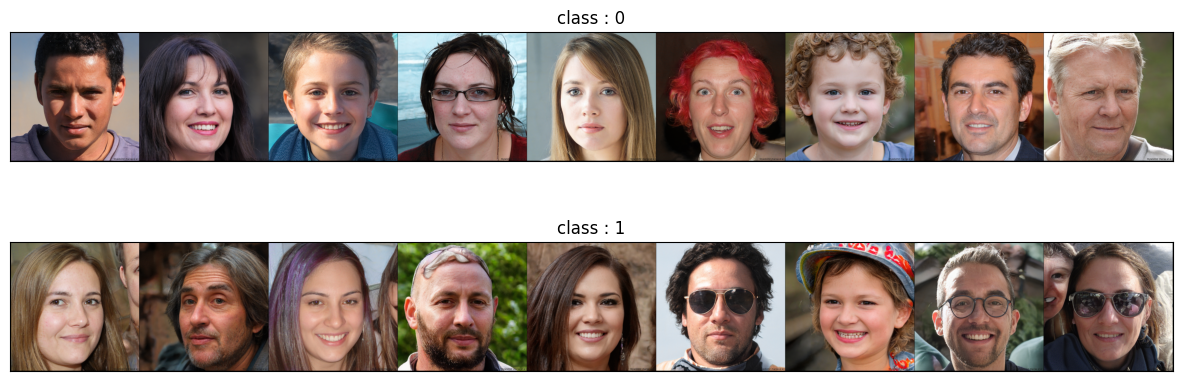

In [58]:
vis_dataset(img_dataset)

## Transformations

In torchvision datasets there is an option that allows to store transformations that need to be applied to instances of the dataset. It's called `transfrom`, `target_transform` and `transforms`.

### Basic `transform`

Is a transformation to be applied to the input data (`X`).

So in the following cell, `torch.transformation.RandomHorizontalFlip` is used for the Image dataset. So now you don't need to apply a transformation to each image, just access them using indexing operators - torch will do it all for you.

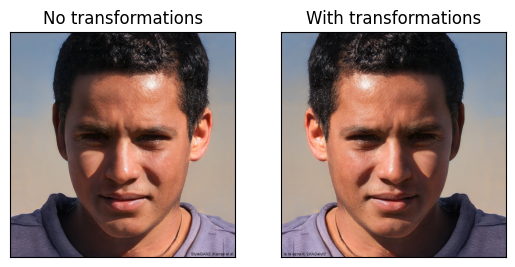

In [22]:
with_transforms = ImageFolder(
    "datasets_files/image_dataset",
    transform = T.RandomHorizontalFlip(p=1)
)
no_transforms = ImageFolder(
    "datasets_files/image_dataset"
)
plt.subplot(121)
plt.title("No transformations")
plt.imshow(no_transforms[0][0])
plt.xticks([]); plt.yticks([])

plt.subplot(122)
plt.title("With transformations")
plt.imshow(with_transforms[0][0])
plt.yticks([]); plt.xticks([])

plt.show()

### `target_transform`

You can apply some tranformations to the target. For example in the following cell is applied transformation thar replace 0 with A, 1 with B. You can see the raw output of the dataset and visualisation - both have "A" and "B" instead of 1 and 2.

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA0781E82E0>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA0722944C0>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA072294F70>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA0781E82E0>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA078241B70>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA072294F70>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA0722944C0>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA0781E82E0>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA078241720>, 'A')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA0722944C0>, 'B')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA072297A60>, 'B')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA072294F70>, 'B')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA078242470>, 'B')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA072294F70>, 'B')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA078240EE0>, 'B')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA072294F70>, 'B')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA078242CB0>, 'B')

(<PIL.Image.Image image mode=RGB size=1024x1024 at 0x7FA072294F70>, 'B')

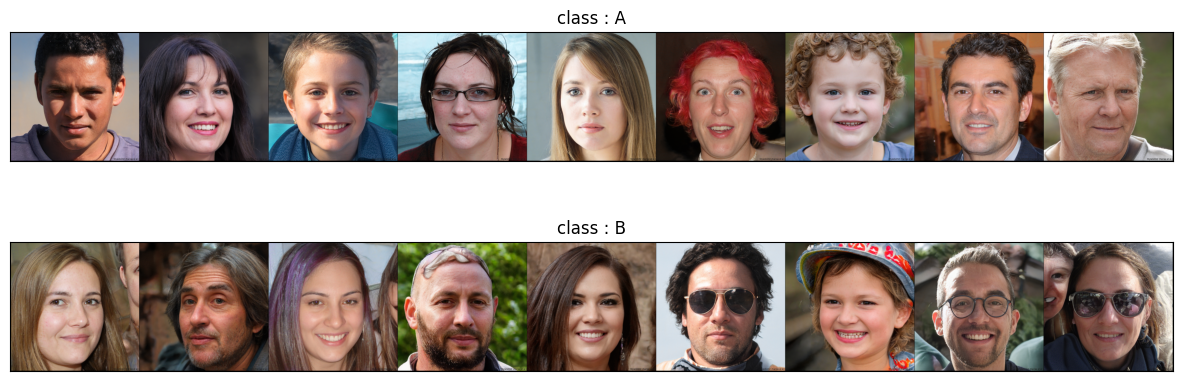

In [70]:
target_transformed = ImageFolder(
    "datasets_files/image_dataset",
    target_transform=T.Lambda(lambda x: "A" if x==0 else "B")
)


display(HTML("<h4>Raw display</h4>"))
for v in target_transformed:
    display(v)
display(HTML("<h4>Visualisation</h4>"))
vis_dataset(target_transformed)

### Change transformations

There is a slightly confusing situation with changing transformations in Torch. The best universal way is to recreate the dataset. 

A very common example is when you have a data set and you need to normalise it. You need to load it to calculate the mean and the standard deviation. But then you re-create it using the mean and the standard deviation that you have previously calculated for the normalisation transformation.

The following example shows how normalisation can be performed on a sample dataset. As you can see, the normalisation worked well - we ended up with a data set with zero bias and one as the standard deviation:

In [106]:
dataset = ImageFolder("datasets_files/image_dataset", transform=T.ToTensor())
X_as_tensor = torch.stack([x for x, y in dataset])
mean = X_as_tensor.mean(axis = (0, 2, 3))
std = X_as_tensor.std(axis = (0, 2, 3))

print("Initial mean:", mean)
print("Initial std:", std, end = "\n\n")

dataset = ImageFolder(
    "datasets_files/image_dataset",
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean, std)
    ])
)
X_as_tensor = torch.stack([x for x, y in dataset])
mean = X_as_tensor.mean(axis = (0, 2, 3))
std = X_as_tensor.std(axis = (0, 2, 3))

print("Normilised mean:", mean)
print("Normilised std:", std)

Initial mean: tensor([0.4904, 0.4030, 0.3632])
Initial std: tensor([0.2590, 0.2315, 0.2351])

Normilised mean: tensor([ 1.5563e-07, -6.8711e-08, -1.5274e-07])
Normilised std: tensor([1., 1., 1.])
